# Import Libraries

In [1]:
import pandas as pd  # Used for data manipulation and analysis
import pickle  # Used for saving and loading Python objects such as models and scalers
import matplotlib.pyplot as plt  # Used for creating static, animated, and interactive visualizations
import seaborn as sns  # Based on matplotlib, used for making statistical graphics
from sklearn.model_selection import train_test_split  # Used to split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Used for standardizing features by removing the mean and scaling to unit variance
from sklearn.svm import SVR  # Support Vector Regression algorithm used for predicting continuous values
from sklearn.metrics import mean_squared_error, r2_score  # Metrics to evaluate model performance

# Data Load and Understanding

In [2]:
class DataLoader:
    pass


In [3]:
def dataLoader(filepath):
    """
    Loads a CSV file into a pandas DataFrame.

    Parameters:
        filepath (str): Path to the CSV file.

   Description:
        This function loads the CSV file specified by `filepath` into a pandas DataFrame
        and returns it. It does NOT print or display any summary information inside
        the function. Instead, the user can call DataFrame methods (e.g., head(), info())
        on the returned object to explore the data as needed.
    """
    df = pd.read_csv(filepath)
    return df


df = dataLoader('car_sales_data.csv')


print("Data Loaded Successfully.")

print("Data Head:")
print(df.head())

print("\nData Tail:")
print(df.tail())

print("\nData Description:")
print(df.describe())

print("\nData Info:")
df.info()  # info() prints by itself

print("\nData Sample:")
print(df.sample(5))

Data Loaded Successfully.
Data Head:
   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
0               21.50          1.8       140.0             28.0  16.919
1               28.40          3.2       225.0             25.0  39.384
2                 NaN          3.2       225.0             26.0  14.114
3               42.00          3.5       210.0             22.0   8.588
4               23.99          1.8       150.0             27.0  20.397

Data Tail:
     Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
152                24.4          1.9       160.0             25.0   3.545
153                27.5          2.4       168.0             25.0  15.245
154                28.8          2.4       168.0             25.0  17.531
155                45.5          2.3       236.0             23.0   3.493
156                36.0          2.9       201.0             24.0  18.969

Data Description:
       Price_in_thousands  Engine_size  Horsepower  Fuel

# Data Preprocessing

In [4]:
class Preprocessor:
    def __init__(self, df):
        self.df = df
    """
    Initializes the Preprocessor object.

     Parameters
    
    df : pandas.DataFrame
        The input DataFrame that needs to be preprocessed. This is a
        required parameter containing the data to be manipulated.

    Description
    
    The `handle_missing` method addresses missing data within the DataFrame by removing
    any rows that contain at least one NaN (Not a Number) value. This
    is a common initial step in data cleaning to ensure that subsequent
    analysis or modeling is not affected by incomplete data. .
    The `preprocess` method orchestrates the sequence of preprocessing operations
    to be applied to the DataFrame. Currently, it calls the
    `handle_missing` method to remove rows with missing values. In
    the future, this method could be extended to include other
    preprocessing techniques such as feature scaling, encoding, or
    outlier handling. 
    """

    def handle_missing(self):
        self.df = self.df.dropna()
        return self.df

    def preprocess(self):
        self.df = self.handle_missing()
        return self.df
prep = Preprocessor(df)
df_clean = prep.preprocess()


print("Cleaned DataFrame shape:", df_clean.shape)
print(df_clean.head())

Cleaned DataFrame shape: (153, 5)
   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
0               21.50          1.8       140.0             28.0  16.919
1               28.40          3.2       225.0             25.0  39.384
3               42.00          3.5       210.0             22.0   8.588
4               23.99          1.8       150.0             27.0  20.397
5               33.95          2.8       200.0             22.0  18.780


# Univariate Analysis


--- Histograms ---


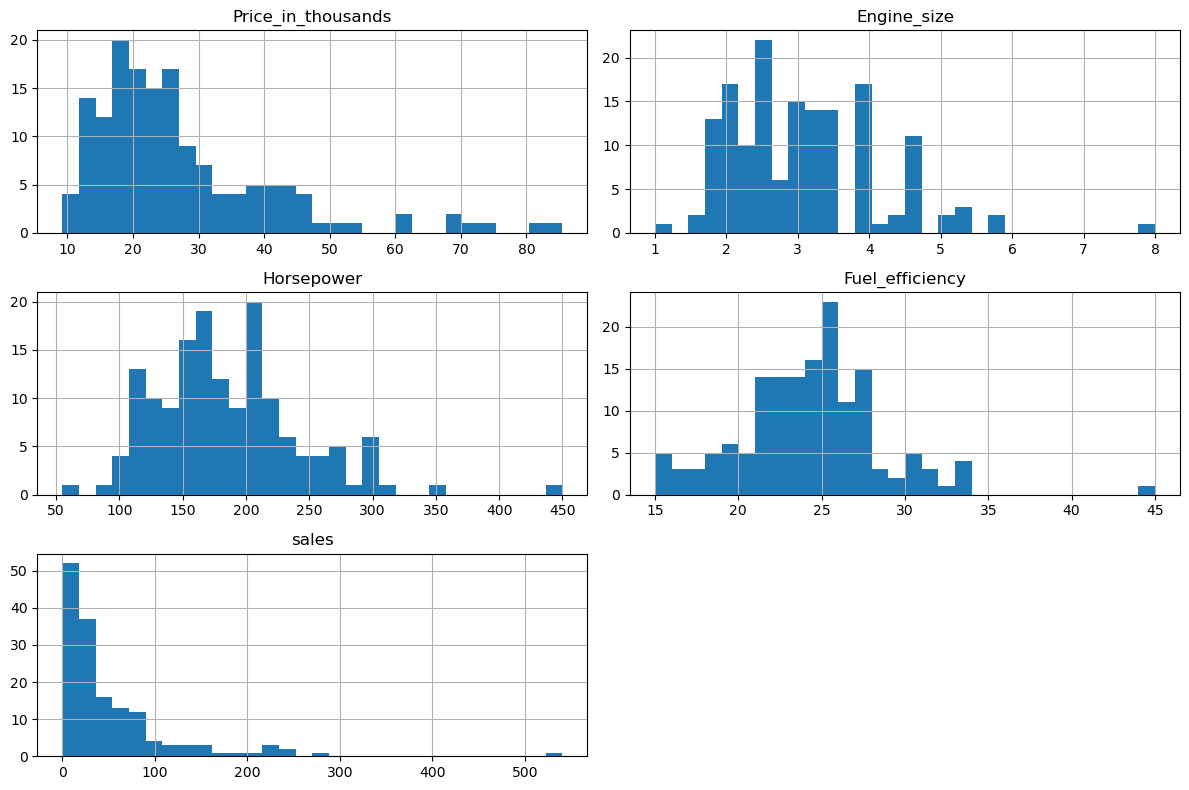


--- Boxplots ---


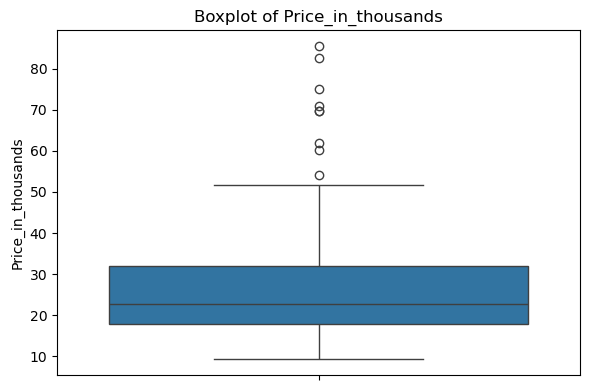

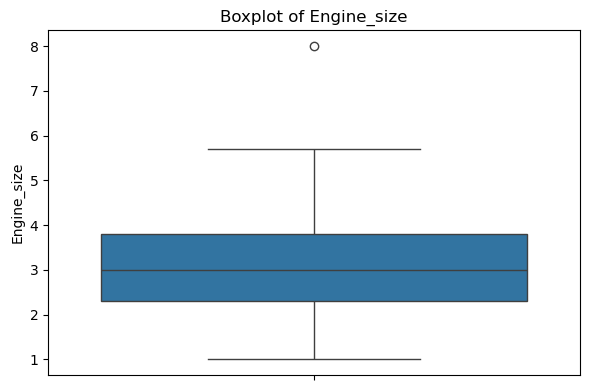

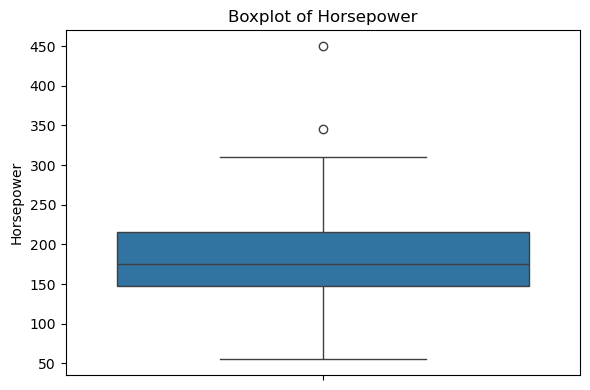

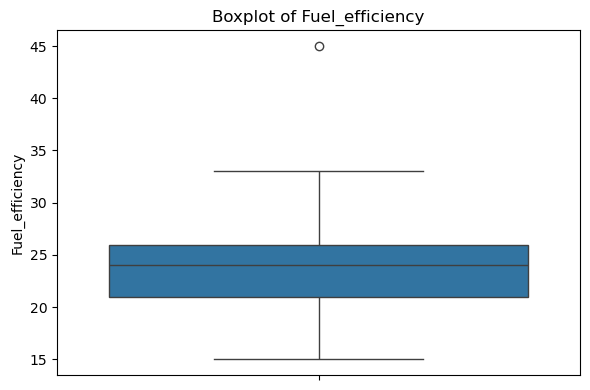

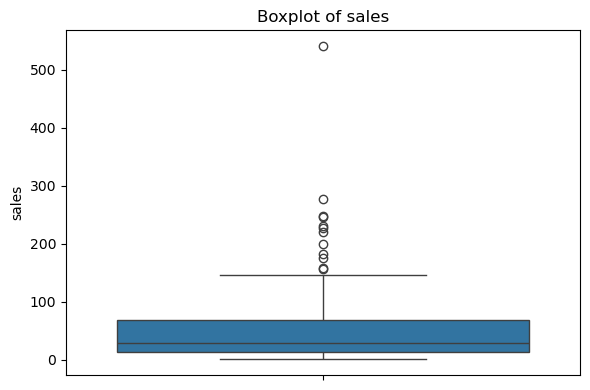


--- KDE (Density) Plots ---


C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\221153906.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[col], shade=True)


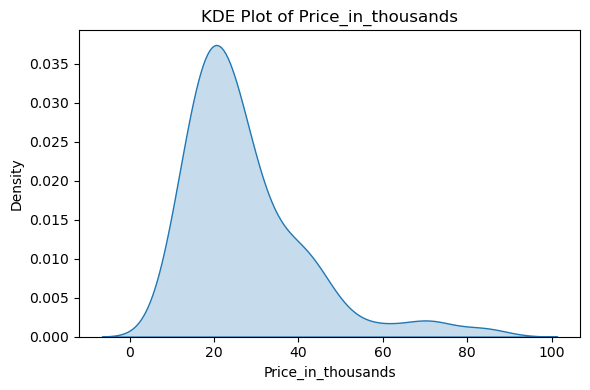

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\221153906.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[col], shade=True)


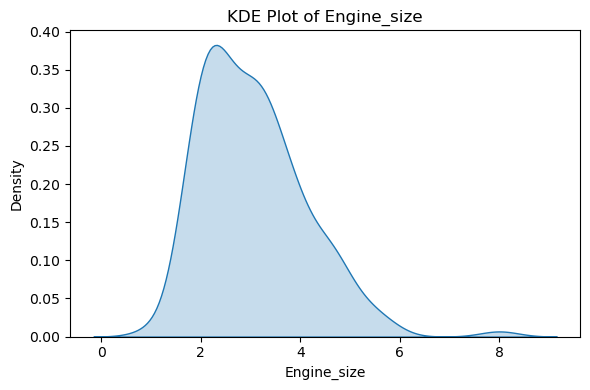

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\221153906.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[col], shade=True)


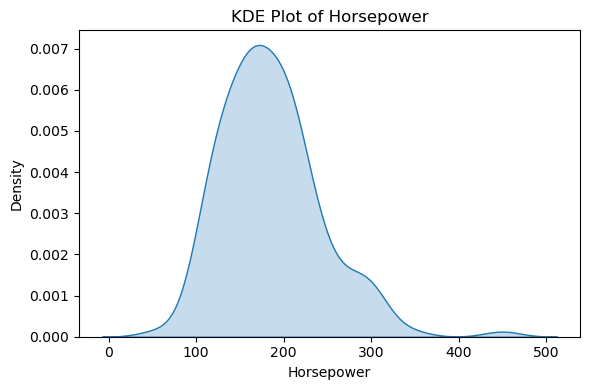

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\221153906.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[col], shade=True)


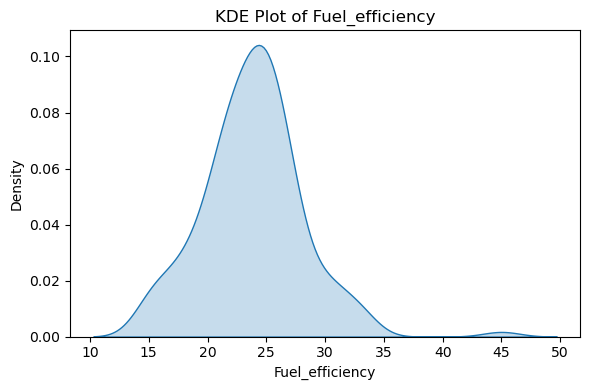

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\221153906.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(self.df[col], shade=True)


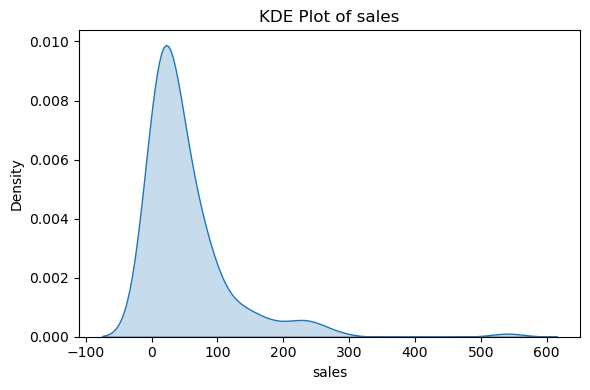

In [5]:
class UnivariateAnalysis:
    def __init__(self, df):
        self.df = df
        self.num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
    """
    Initializes the UnivariateAnalysis object.

    Parameters
   
    df : pandas.DataFrame
        The input DataFrame to be analyzed. The univariate analysis will be
        performed on its numerical columns.

    Description
    - `plot_histograms`: Generates histograms for each numerical column,
      showing the frequency of data points within different bins.
    - `plot_boxplots`: Creates boxplots for each numerical column, providing
      a summary of the data's central tendency, spread, and potential outliers.
    - `plot_kde`: Produces Kernel Density Estimate (KDE) plots for each
      numerical column, offering a smoothed visualization of the probability
      density function.

    The analysis is automatically applied to all columns with integer or
    float data types present in the input DataFrame.
    """

    def plot_histograms(self):
        print("\n--- Histograms ---")
        self.df[self.num_cols].hist(bins=30, figsize=(12, 8))
        plt.tight_layout()
        plt.show()

    def plot_boxplots(self):
        print("\n--- Boxplots ---")
        for col in self.num_cols:
            plt.figure(figsize=(6, 4))
            sns.boxplot(y=self.df[col])
            plt.title(f"Boxplot of {col}")
            plt.tight_layout()
            plt.show()

    def plot_kde(self):
        print("\n--- KDE (Density) Plots ---")
        for col in self.num_cols:
            plt.figure(figsize=(6, 4))
            sns.kdeplot(self.df[col], shade=True)
            plt.title(f"KDE Plot of {col}")
            plt.tight_layout()
            plt.show()
uni_analysis = UnivariateAnalysis(df_clean)
uni_analysis.plot_histograms()
uni_analysis.plot_boxplots()
uni_analysis.plot_kde()



# Bivariate Analysis

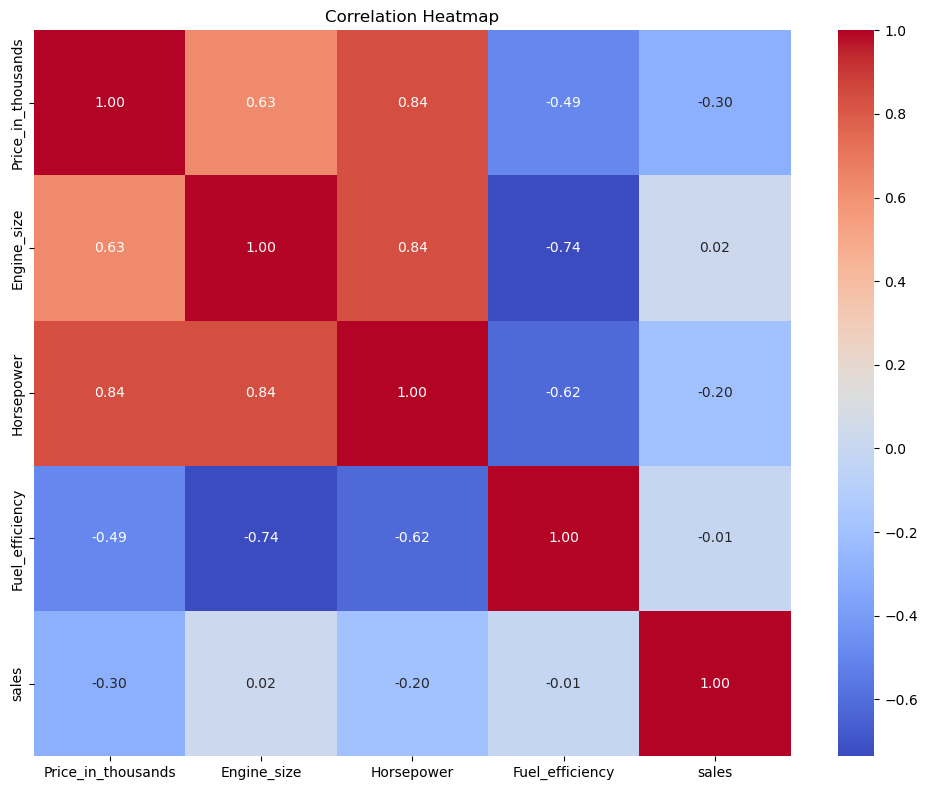


--- Scatter Plots with target 'sales' ---


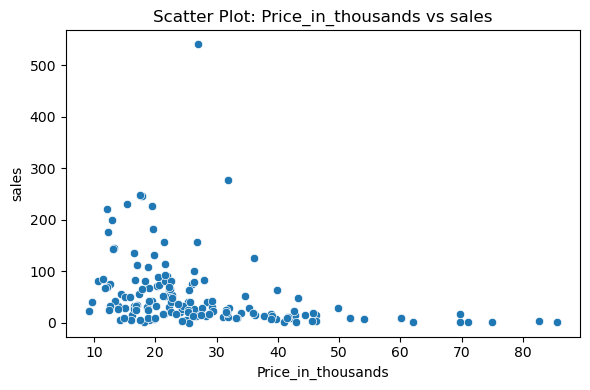

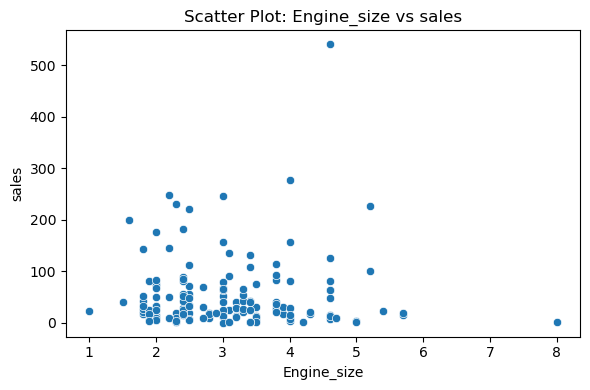

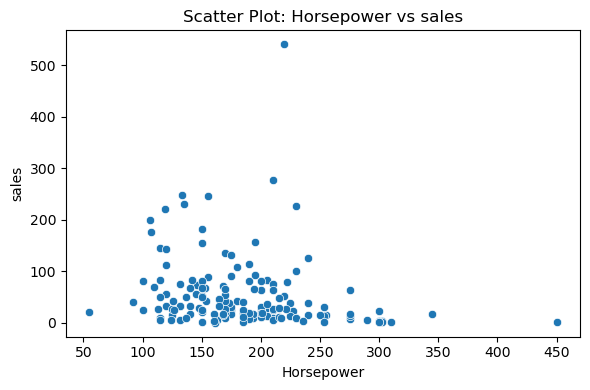

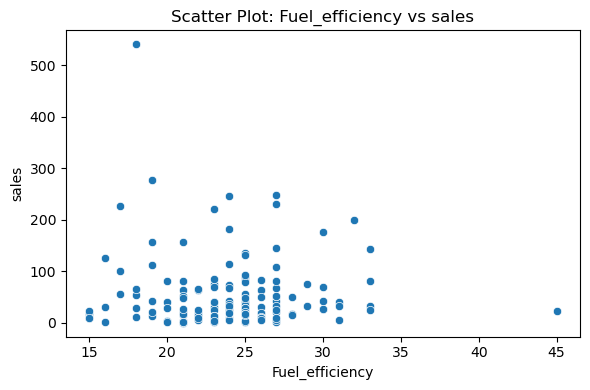


--- Regression Plots with target 'sales' ---


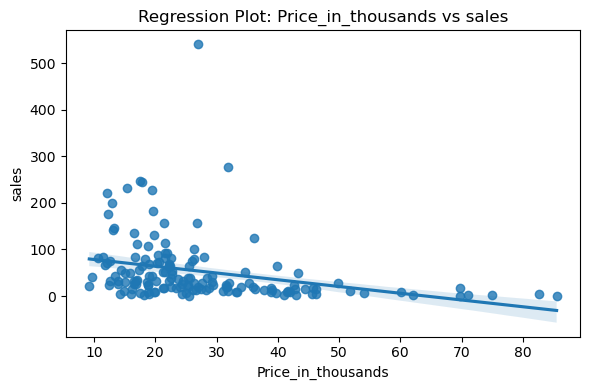

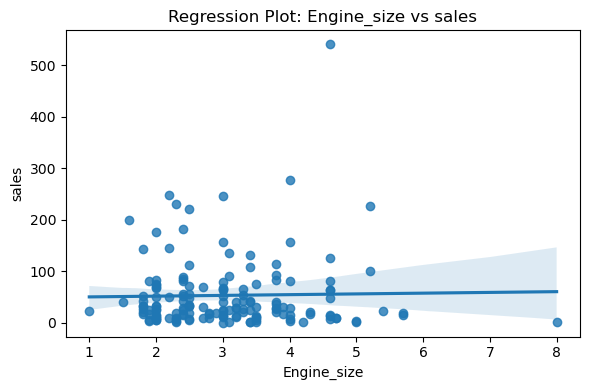

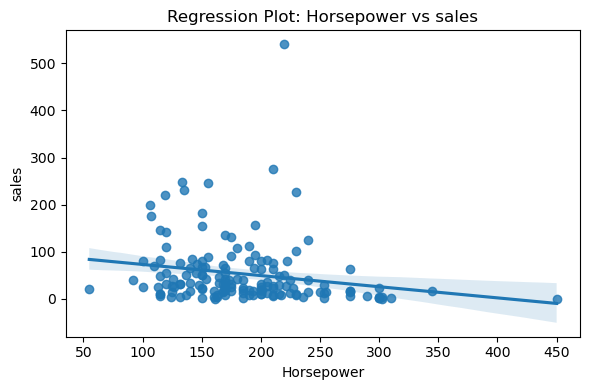

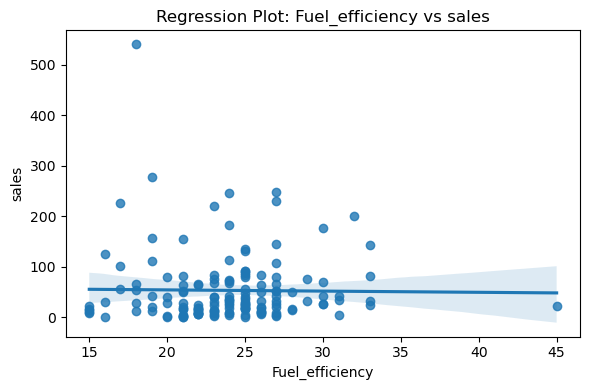

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\376237344.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['binned'] = pd.qcut(self.df[feature], q=4)


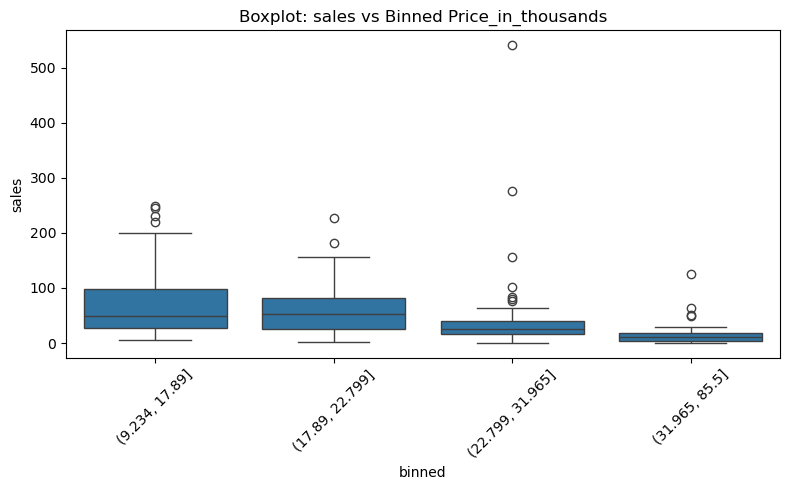

C:\Users\RAJPOOT BHATTI\AppData\Local\Temp\ipykernel_12140\376237344.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.drop(columns=['binned'], inplace=True)


In [6]:
class BivariateAnalysis:
    def __init__(self, df):
        self.df = df
        self.num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
    """
    Function: BvariateAalysis
    Parameters:
        df : DataFrame : Cleaned DataFrame (Required)
        target : str : Target column (default='sales')

    Description:
        This function explores relationships between two variables using:
        - Heatmap: Visualizes correlations between numerical features.
        - Scatter and Regression plots: Show relationship of each feature with the target.
        - Pairplot: Visualizes pairwise relationships across numerical features.
        - Binned Boxplot: Groups a feature into quartiles and compares it with the target.
    """

    def plot_heatmap(self):
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df[self.num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def plot_scatterplots(self, target='sales'):
        print(f"\n--- Scatter Plots with target '{target}' ---")
        for col in self.num_cols:
            if col != target:
                plt.figure(figsize=(6, 4))
                sns.scatterplot(x=self.df[col], y=self.df[target])
                plt.title(f"Scatter Plot: {col} vs {target}")
                plt.tight_layout()
                plt.show()

    def plot_regplots(self, target='sales'):
        print(f"\n--- Regression Plots with target '{target}' ---")
        for col in self.num_cols:
            if col != target:
                plt.figure(figsize=(6, 4))
                sns.regplot(x=self.df[col], y=self.df[target])
                plt.title(f"Regression Plot: {col} vs {target}")
                plt.tight_layout()
                plt.show()

    def plot_binned_boxplot(self, feature='Price_in_thousands', target='sales'):
        if feature not in self.num_cols:
            print(f"{feature} not in numerical columns.")
            return
        self.df['binned'] = pd.qcut(self.df[feature], q=4)
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='binned', y=target, data=self.df)
        plt.title(f"Boxplot: {target} vs Binned {feature}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        self.df.drop(columns=['binned'], inplace=True)
biv = BivariateAnalysis(df_clean)
biv.plot_heatmap()
biv.plot_scatterplots(target='sales')
biv.plot_regplots(target='sales')
biv.plot_binned_boxplot(feature='Price_in_thousands', target='sales')

# Data Split

In [7]:
class DataSplitter:
    def __init__(self, df):
        self.df = df
    """
    Function: split_data
    Parameters:
        df : DataFrame : Cleaned DataFrame (Required)

    Description:
        This function separates the features (X) and target (y),
        and splits them into training and testing sets.
    """

    def split(self):
        X = self.df.drop('sales', axis=1)
        y = self.df['sales']
        print("Columns used for training:", X.columns.tolist())
        return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = DataSplitter(df_clean).split()

print("X_train:", X_train.shape, " | y_train:", y_train.shape)


Columns used for training: ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency']
X_train: (122, 4)  | y_train: (122,)


# Scaler

In [8]:
class Scaler:
    def __init__(self):
        self.scaler = StandardScaler()
    """
    Function: scale_features
    Parameters:
        X_train : array : Training features (Required)
        X_test : array : Testing features (Required)
        filepath : str : File to save scaler (default='scaler.pkl')

    Description:
        This function applies standard scaling (mean=0, std=1) to features.
        The scaler is saved to a file for reuse during inference.
    """

    def scale_and_save(self, X_train, X_test, filepath='scaler.pkl'):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        with open(filepath, 'wb') as f:
            pickle.dump(self.scaler, f)
        print(f"Scaler saved to {filepath}")

        return X_train_scaled, X_test_scaled
scaler = Scaler()
X_train_scaled, X_test_scaled = scaler.scale_and_save(X_train, X_test)


Scaler saved to scaler.pkl


# Model Train

In [9]:
class ModelTrainer:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    """
    Function: train_model
    Parameters:
        X_train : array : Scaled training data (Required)
        y_train : array : Training target (Required)

    Description:
        This function trains an SVR (Support Vector Regression) model using an RBF kernel,
        which is useful for modeling nonlinear relationships.
    """

    def train(self):
        model = SVR(kernel='rbf')
        model.fit(self.X_train, self.y_train)
        print("SVM Model trained.")
        return model

model = ModelTrainer(X_train_scaled, y_train).train()

SVM Model trained.


# Model Evaluate


MSE: 4879.68
R^2 Score: -0.3559


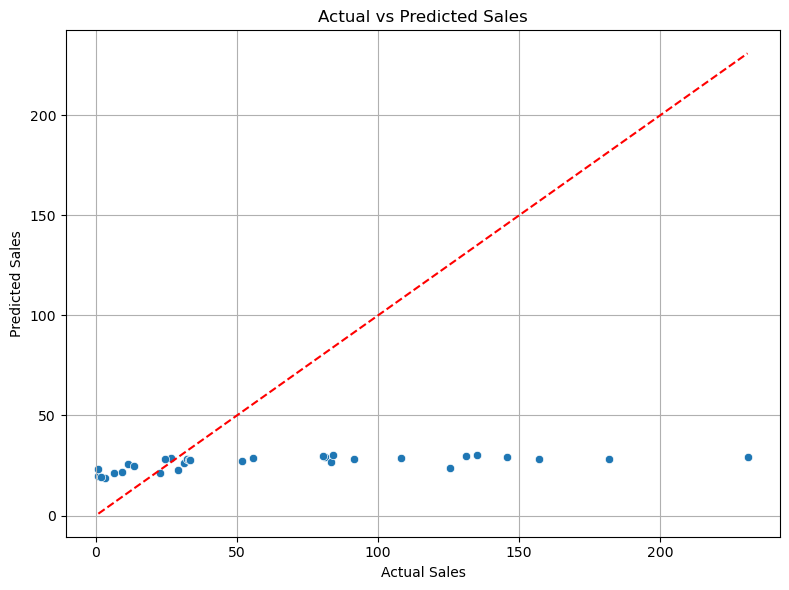

In [10]:
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
    """
    Function: evaluate_model
    Parameters:
        model : estimator : Trained model (Required)
        X_test : array : Scaled test data (Required)
        y_test : array : Test target (Required)

    Description:
        This function evaluates the trained model using Mean Squared Error (MSE)
        and R-squared score. It also generates a scatter plot comparing actual
        vs predicted target values.
    """

    def evaluate(self):
        y_pred = self.model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f"\nMSE: {mse:.2f}")
        print(f"R^2 Score: {r2:.4f}")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=self.y_test, y=y_pred)
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'r--')
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual vs Predicted Sales")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

ModelEvaluator(model, X_test_scaled, y_test).evaluate()

# Model Save

In [11]:
class ModelSaver:
    def __init__(self, model, filename='car_sales_model_svm.pkl'):
        self.model = model
        self.filename = filename
    """
    Function: save_model
    Parameters:
        model : estimator : Trained model (Required)
        filename : str : Path to save model (default='car_sales_model_svm.pkl')

    Description:
        This function saves the trained model to a .pkl file using the pickle library,
        allowing the model to be reused later without retraining.
    """

    def save_model(self):
        with open(self.filename, 'wb') as f:
            pickle.dump(self.model, f)
        print(f"Model saved as {self.filename}")

ModelSaver(model).save_model()

Model saved as car_sales_model_svm.pkl
